# Project Title: Data scientist salary prediction 

# Problem Statement :
In todays ERA demand of Data Science field is growing day by day. As a student and also professional employees are choosing their career in this sector.
Everyone fresher or experienced person always have question that how's the data science field and what is starting package for fresher as well as  for experienced one.
The data scientist salary will be depend on mainly Age, Skills, experience and education and so on. So as we are predicting salary so different regression algoriths will be useful

In [1]:
#pandas library use to load dataset and also manipulate tabular data
import pandas as pd
#numpy library use to do array operations and also to do calculations
import numpy as np
#matplot library use to plot different graphs
import matplotlib.pyplot as plt
#seaborn library use to plot differentplots
import seaborn as sns
# figure size in inches
from matplotlib import rcParams
#importing stats model to add intercept and to implement OLS
import statsmodels.api as sm
#importing sklearn for split data
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# importing random lib for replace age values
import random

In [2]:
# Here we are importing dataset by using pandas
df= pd.read_csv("/kaggle/input/data-scientist-salary-us-glassdoor/data_cleaned_2021.csv")

In [3]:
salary=df #creating new data frame 

In [4]:
pd.options.display.max_columns=None

In [5]:
# Here we are checking data is loaded or not and also checking top 5 observations
salary.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


# As in our dataset we have "-1" as null values so we replace them with nan but some are object columns and some are int columns. so we have to replace to both

In [6]:
salary.shape#Checking shape of columns

(742, 42)

In [7]:
salary=salary.replace(['-1'],[np.nan])

In [8]:
salary=salary.replace([-1],[np.nan])

In [9]:
salary.Rating.unique() # As we see there is -1 value present in rating column. -1 is not valid rating so we check frequency of -1

array([3.8, 3.4, 4.8, 2.9, 4.1, 3.3, 4.6, 3.5, 3.2, 3.7, 3.6, 3.9, 4.3,
       4.2, 4. , 4.7, 5. , 3.1, 4.4, 2.8, 2.7, 1.9, 4.5, 3. , 2.3, 2.6,
       nan, 2.4, 2.5, 2.2, 2.1])

In [10]:
# As data is always in raw format so we have to clear data and for that we have to check mainly data types of all columns
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    float64
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              731 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        741 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             692 non-null    float64
 10  Type of ownership   742 non-null    object 
 11  Industry            732 non-null    object 
 12  Sector              732 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         282 non-null    object 
 15  Hourly              742 non-null    float64
 16  Employer

In [11]:
#As for prediction there is no reqyuirement of index column so we are dropping that column
salary = salary.drop("index",axis=1)

In [12]:
salary.shape #checking column drop or not first we have 42 columns currently we have 41 

(742, 41)

# EDA

In [13]:
salary["Company Name"].value_counts()

MassMutual\n3.6                                         14
Reynolds American\n3.1                                  14
Takeda Pharmaceuticals\n3.7                             14
Software Engineering Institute\n2.6                     11
PNNL\n3.8                                               10
                                                        ..
Dayton Freight Lines, Inc.\n4.3                          1
Community Action Partnership of San Luis Obispo\n2.8     1
TrueAccord\n3.4                                          1
DRB Systems\n4.0                                         1
Fivestars\n3.9                                           1
Name: Company Name, Length: 343, dtype: int64

In [14]:
salary.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),NaN,0.0,0.0,53.0,91.0,72.0,Tecolote Research,NM,48.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,0.0,0.0,63.0,112.0,87.5,University of Maryland Medical System,MD,37.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,data scientist,na,M


In [15]:
# As we can see in above data that some columns are repeat like comapany_txt and Job location. Data present in these two columns 
# are same as location and Job title. So we are dropping both columns 
salary.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [16]:
salary.isnull().sum()

Job Title               0
Salary Estimate         0
Job Description         0
Rating                 11
Company Name            0
Location                0
Headquarters            1
Size                    0
Founded                50
Type of ownership       0
Industry               10
Sector                 10
Revenue                 0
Competitors           460
Hourly                  0
Employer provided       0
Lower Salary            0
Upper Salary            0
Avg Salary(K)           0
company_txt             0
Job Location            0
Age                    50
Python                  0
spark                   0
aws                     0
excel                   0
sql                     0
sas                     0
keras                   0
pytorch                 0
scikit                  0
tensor                  0
hadoop                  0
tableau                 0
bi                      0
flink                   0
mongo                   0
google_an               0
job_title_si

## As our data frame contains missing values name as "-1" So to handle missing values we check missing values column data type i.e. "Object" so we replace it with mode

# First Handle categorical columns null values

In [17]:
salary["Competitors"] = salary["Competitors"].fillna(salary["Competitors"].mode()[0]) 

In [18]:
salary["Industry"] = salary["Industry"].fillna(salary["Industry"].mode()[0]) 

In [19]:
salary["Sector"] = salary["Sector"].fillna(salary["Sector"].mode()[0]) 

In [20]:
salary["Headquarters"] = salary["Headquarters"].fillna(salary["Headquarters"].mode()[0]) 

# Second we handle numeric columns null values

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


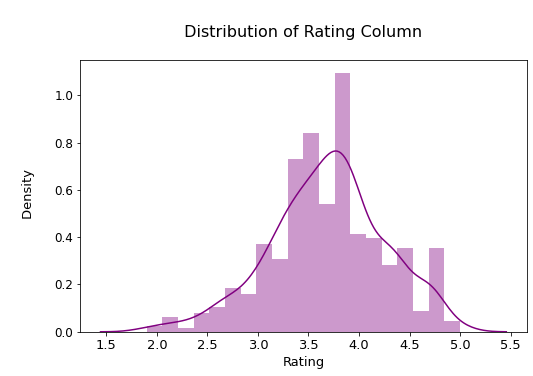

In [21]:
# Lets look at how the 'Rating' column is distributed:

plt.figure(figsize=(8,5))
plt.title('\n Distribution of Rating Column \n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(salary.Rating,color="purple")
plt.show()

It follows a normal distribution, therefore we can replace null values with the mean of the distribution.

In [22]:
salary["Rating"] = salary["Rating"].fillna(salary["Rating"].mean())

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


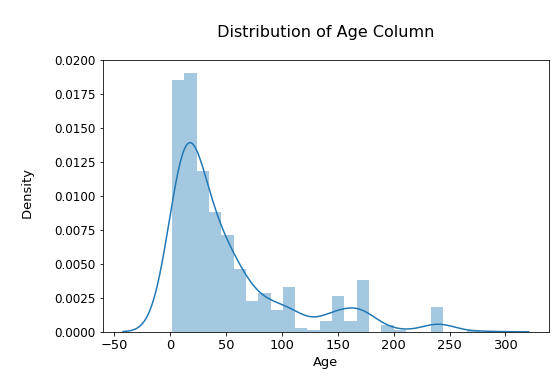

In [23]:
# Lets look at how the 'Age' column is distributed:

plt.figure(figsize=(8,5))
plt.title('\n Distribution of Age Column \n', size=16, color='black')
plt.xlabel('\n Age \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(salary.Age)
plt.show()

# As we can see data is right skewed we replace null values with median.

In [24]:
salary["Age"] = salary["Age"].fillna(salary["Age"].median())

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


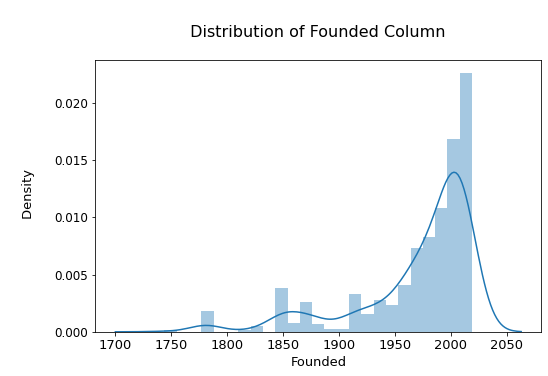

In [25]:
# Lets look at how the 'Founded' column is distributed:

plt.figure(figsize=(8,5))
plt.title('\n Distribution of Founded Column \n', size=16, color='black')
plt.xlabel('\n Founded \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(salary.Founded)
plt.show()

# As we can see data is left skewed we replace null values with median.

In [26]:
salary["Founded"].median()

1992.0

In [27]:
salary["Founded"] = salary["Founded"].fillna(salary["Founded"].median())

# At last check we check is there any null values or not

In [28]:
salary.isnull().sum()

Job Title             0
Salary Estimate       0
Job Description       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded               0
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Hourly                0
Employer provided     0
Lower Salary          0
Upper Salary          0
Avg Salary(K)         0
company_txt           0
Job Location          0
Age                   0
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
job_title_sim         0
seniority_by_title    0
Degree                0
dtype: int64

There are no missing values in data frame so we can proceed to our next EDA

## There are no missing values in data frame

In [29]:
salary.describe() #checking statistics of numeric variable

,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.688372,1971.454178,0.032345,0.022911,74.754717,128.214286,101.484501,49.545822,0.528302,0.225067,0.237197,0.522911,0.512129,0.088949,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,0.566104,52.524552,0.177034,0.149721,30.945892,45.128650,37.482449,52.524552,0.499535,0.417908,0.425651,0.499812,0.500190,0.284862,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,1.900000,1744.000000,0.000000,0.000000,15.000000,16.000000,15.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1961.000000,0.000000,0.000000,52.000000,96.000000,73.500000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1992.000000,0.000000,0.000000,69.500000,124.000000,97.500000,29.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In above summary statistics we get mean value and all quartile values of all columns and as well as min, max values. So following are observations:
1. Average lower salary is about 75 K pa. 
We see 75% of the jobs positing has minimum salary =< than 91K pa, so it doesn't look like the mean value is affected much by the outlier(15K or 202K pa).
2. Average maximum salary is around 128K pa. 
We see 75% of the jobs positing has maximum salary =< than 155K pa, so it doesn't look like the mean value is affected much by the outlier(16K or 306K pa).
3. Mean Avg. salary is about 101K pa.

In given data set there are two columns namely "Location" and "Job Location". In Location column city name and state abbreviation
given and in location column only state abreviation given. So first we will check abbreviation and location column last state abbrevation

## There are two columns named as company name and company txt so we will check difference and work on them

In [30]:
salary["Company Name"]

0                          Tecolote Research\n3.8
1      University of Maryland Medical System\n3.4
2                                    KnowBe4\n4.8
3                                       PNNL\n3.8
4                         Affinity Solutions\n2.9
                          ...                    
737                                      GSK\n3.9
738                               Eventbrite\n4.4
739           Software Engineering Institute\n2.6
740                             Numeric, LLC\n3.2
741             Riverside Research Institute\n3.6
Name: Company Name, Length: 742, dtype: object

In [31]:
salary["Company Name"]=salary["Company Name"].str[:-4] #"company Name column conatin name with rating also so we are removing rating given in that column"

In [32]:
salary["Company Name"]

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company Name, Length: 742, dtype: object

In [33]:
salary["company_txt"]

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [34]:
salary['compare'] = (salary['Company Name'] == salary['company_txt'])
salary['compare'] 

0      True
1      True
2      True
3      True
4      True
       ... 
737    True
738    True
739    True
740    True
741    True
Name: compare, Length: 742, dtype: bool

In [35]:
salary['compare'].value_counts()# checking both column values are same or not but we get to know that 11 are different values

True     731
False     11
Name: compare, dtype: int64

# checking False values to change their company name

In [36]:
salary[salary["compare"]==False]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,compare
176,Principal Data Scientist with over 10 years ex...,Employer Provided Salary:$200K-$250K,Position Title: Principal Data Scientist\nLoca...,3.688372,CA-One Tech C,"San Francisco, CA","Fremont, CA",51 - 200,2017.0,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),"Novartis, Baxter, Pfizer",0.0,1.0,200.0,250.0,225.0,CA-One Tech Clou,CA,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,data scientist,sr,na,False
266,Principal Data Scientist with over 10 years ex...,Employer Provided Salary:$200K-$250K,Position Title: Principal Data Scientist\nLoca...,3.688372,CA-One Tech C,"San Francisco, CA","Fremont, CA",51 - 200,2017.0,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),"Novartis, Baxter, Pfizer",0.0,1.0,200.0,250.0,225.0,CA-One Tech Clou,CA,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,data scientist,sr,na,False
300,Data Operations Lead,Employer Provided Salary:$85K-$90K,Data Operations Lead\nLocation: Flexible thoug...,3.688372,,"San Francisco, CA","San Francisco, CA",201 - 500,1992.0,Nonprofit Organization,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,"Novartis, Baxter, Pfizer",0.0,1.0,85.0,90.0,87.5,Mus,CA,29.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,na,sr,M,False
370,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",3.688372,Kronos,"Cambridge, MA","San Mateo, CA",unknown,1992.0,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,"Novartis, Baxter, Pfizer",0.0,1.0,100.0,140.0,120.0,Kronos Bi,MA,29.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other scientist,na,P,False
404,"Senior Scientist, Cell Pharmacology/Assay Deve...",Employer Provided Salary:$110K-$130K,"Senior Scientist, Cell Pharmacology/Assay Deve...",3.688372,Kronos,"Cambridge, MA","San Mateo, CA",unknown,1992.0,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,"Novartis, Baxter, Pfizer",0.0,1.0,110.0,130.0,120.0,Kronos Bi,MA,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other scientist,sr,P,False
456,Data Scientist,$81K-$140K (Glassdoor est.),"As a Data Scientist, you will play a critical ...",3.688372,,"New York, NY","Noida, India",unknown,1992.0,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,"Novartis, Baxter, Pfizer",0.0,0.0,81.0,140.0,110.5,ALI,NY,29.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,data scientist,na,M,False
551,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",3.688372,Kronos,"Cambridge, MA","San Mateo, CA",unknown,1992.0,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,"Novartis, Baxter, Pfizer",0.0,1.0,100.0,140.0,120.0,Kronos Bi,MA,29.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other scientist,na,P,False
581,"Scientist – Cancer Discovery, Molecular Assay",Employer Provided Salary:$100K-$135K,"Scientist – Cancer Discovery, Molecular Assay\...",3.688372,Monte Rosa Therapeu,"Cambridge, MA","New York, NY",unknown,1992.0,Other Organization,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,"Novartis, Baxter, Pfizer",0.0,1.0,100.0,135.0,117.5,Monte Rosa Therapeutic,MA,29.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other scientist,na,P,False
609,"Seni

In [37]:
print(salary[salary["compare"]==False].index.values)

[176 266 300 370 404 456 551 581 609 641 730]


In [38]:
print(salary[salary["Company Name"]=="Kronos"].index.values)

[370 404 551 609 641 730]


In [39]:
df.loc[[370,404,551,609,641,730]] # checking original data frame company name values as we reduced name by 4 letters from right side

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
370,472,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,1,100,140,120.0,Kronos Bi,MA,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,na,P
404,518,"Senior Scientist, Cell Pharmacology/Assay Deve...",Employer Provided Salary:$110K-$130K,"Senior Scientist, Cell Pharmacology/Assay Deve...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,1,110,130,120.0,Kronos Bi,MA,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,sr,P
551,703,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,1,100,140,120.0,Kronos Bi,MA,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,na,P
609,778,"Senior Scientist, Cell Pharmacology/Assay Deve...",Employer Provided Salary:$110K-$130K,"Senior Scientist, Cell Pharmacology/Assay Deve...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,1,110,130,120.0,Kronos Bi,MA,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,sr,P
641,819,"Principal Research Scientist/Team Lead, Medici...",Employer Provided Salary:$120K-$145K,"Principal Research Scientist/Team Lead, Medici...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,1,120,145,132.5,Kronos Bi,MA,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,sr,P
730,943,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,1,100,140,120.0,Kronos Bi,MA,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,na,P


#as in above original dataframe comapany name of above index values is **"Kronos Bio"** so we replace them

In [40]:
salary.loc[[370,404,551,609,641,730], 'Company Name'] = "Kronos Bio" 

In [41]:
salary.loc[[370,404,551,609,641,730]] # checking company name changed or not for given index values

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,compare
370,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",3.688372,Kronos Bio,"Cambridge, MA","San Mateo, CA",unknown,1992.0,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,"Novartis, Baxter, Pfizer",0.0,1.0,100.0,140.0,120.0,Kronos Bi,MA,29.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other scientist,na,P,False
404,"Senior Scientist, Cell Pharmacology/Assay Deve...",Employer Provided Salary:$110K-$130K,"Senior Scientist, Cell Pharmacology/Assay Deve...",3.688372,Kronos Bio,"Cambridge, MA","San Mateo, CA",unknown,1992.0,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,"Novartis, Baxter, Pfizer",0.0,1.0,110.0,130.0,120.0,Kronos Bi,MA,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other scientist,sr,P,False
551,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",3.688372,Kronos Bio,"Cambridge, MA","San Mateo, CA",unknown,1992.0,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,"Novartis, Baxter, Pfizer",0.0,1.0,100.0,140.0,120.0,Kronos Bi,MA,29.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other scientist,na,P,False
609,"Senior Scientist, Cell Pharmacology/Assay Deve...",Employer Provided Salary:$110K-$130K,"Senior Scientist, Cell Pharmacology/Assay Deve...",3.688372,Kronos Bio,"Cambridge, MA","San Mateo, CA",unknown,1992.0,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,"Novartis, Baxter, Pfizer",0.0,1.0,110.0,130.0,120.0,Kronos Bi,MA,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other scientist,sr,P,False
641,"Principal Research Scientist/Team Lead, Medici...",Employer Provided Salary:$120K-$145K,"Principal Research Scientist/Team Lead, Medici...",3.688372,Kronos Bio,"Cambridge, MA","San Mateo, CA",unknown,1992.0,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,"Novartis, Baxter, Pfizer",0.0,1.0,120.0,145.0,132.5,Kronos Bi,MA,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other scientist,sr,P,False
730,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",3.688372,Kronos Bio,"Cambridge, MA","San Mateo, CA",unknown,1992.0,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,"Novartis, Baxter, Pfizer",0.0,1.0,100.0,140.0,120.0,Kronos Bi,MA,29.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other scientist,na,P,False


In [42]:
df.loc[[176,266]]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
176,208,Principal Data Scientist with over 10 years ex...,Employer Provided Salary:$200K-$250K,Position Title: Principal Data Scientist\nLoca...,-1.0,CA-One Tech Cloud,"San Francisco, CA","Fremont, CA",51 - 200,2017,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,0,1,200,250,225.0,CA-One Tech Clou,CA,4,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,data scientist,sr,na
266,331,Principal Data Scientist with over 10 years ex...,Employer Provided Salary:$200K-$250K,Position Title: Principal Data Scientist\nLoca...,-1.0,CA-One Tech Cloud,"San Francisco, CA","Fremont, CA",51 - 200,2017,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,0,1,200,250,225.0,CA-One Tech Clou,CA,4,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,data scientist,sr,na


In [43]:
salary.loc[[176,266], 'Company Name'] = "CA-One Tech Cloud" #As name gets reduced so we will change name of above index

In [44]:
df.loc[[300,456]]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
300,377,Data Operations Lead,Employer Provided Salary:$85K-$90K,Data Operations Lead\nLocation: Flexible thoug...,-1.0,Muso,"San Francisco, CA","San Francisco, CA",201 - 500,-1,Nonprofit Organization,-1,-1,Unknown / Non-Applicable,-1,0,1,85,90,87.5,Mus,CA,-1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,na,sr,M
456,583,Data Scientist,$81K-$140K (Glassdoor est.),"As a Data Scientist, you will play a critical ...",-1.0,ALIN,"New York, NY","Noida, India",unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,0,81,140,110.5,ALI,NY,-1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,data scientist,na,M


#For "300" and "456" index there is no name so we change original company name for 300 and 456

In [45]:
salary.loc[[300], 'Company Name'] = "Muso" 

In [46]:
salary.loc[[456], 'Company Name'] = "ALIN" 

# Again checking is there any False values

In [47]:
salary['compare'] = (salary['Company Name'] == salary['company_txt'])

In [48]:
salary['compare'].value_counts()

True     731
False     11
Name: compare, dtype: int64

# As seen in above in company name and company text both are same. There are some False values which have last word alphabet not present in "company_txt" column.So we drop company text column and also compare column which we have created for crosscheck

In [49]:
salary.drop("compare",axis=1,inplace=True)
salary.drop("company_txt",axis=1,inplace=True)

In [50]:
salary.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'Job Location', 'Age', 'Python', 'spark', 'aws',
       'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop',
       'tableau', 'bi', 'flink', 'mongo', 'google_an', 'job_title_sim',
       'seniority_by_title', 'Degree'],
      dtype='object')

In [51]:
#Here we made new column derived for take out state abrevation
salary["Location_abb"]=salary["Location"].str[-2:]

In [52]:
#Here we checking derived abbrevation of state and present column named as job location
salary["Check"]=salary["Job Location"].equals(salary["Location_abb"])

In [53]:
salary["Check"].value_counts() #Here we get to know that job location column is not useful so we are drop that column

True    742
Name: Check, dtype: int64

We dropped "location" column as abbrevation same

In [54]:
salary.drop("Location",axis=1,inplace=True) 
salary.drop("Location_abb",axis=1,inplace=True)
salary.drop("Check",axis=1,inplace=True) # Here we drop location as well as location_abb and check column also

In [55]:
salary.shape#checking column dropped or not

(742, 39)

In [56]:
salary.seniority_by_title.value_counts()

na    519
sr    220
jr      3
Name: seniority_by_title, dtype: int64

In [57]:
salary.Degree.value_counts()

na    383
M     252
P     107
Name: Degree, dtype: int64

In [58]:
# We check relation between degree and avg salary

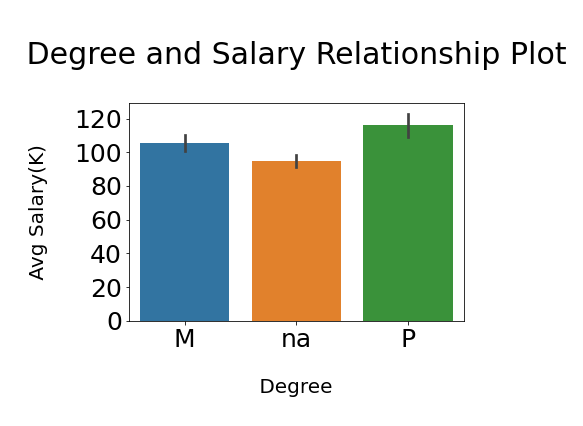

In [59]:
sns.barplot(y="Avg Salary(K)",x="Degree",data=salary)
#Beautifying the plot

plt.title('\n Degree and Salary Relationship Plot \n', size=30, color='black')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('\n Degree \n', fontsize=20, color='black')
plt.ylabel('\n Avg Salary(K) \n', fontsize=20, color='black')
plt.show()

# As above we get to know that more salary will be given to PHD holders also we check with seniority

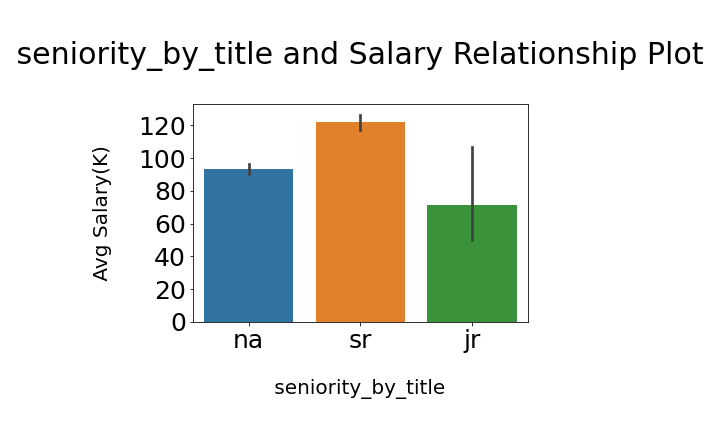

In [60]:
sns.barplot(y="Avg Salary(K)",x="seniority_by_title",data=salary)
#Beautifying the plot

plt.title('\n seniority_by_title and Salary Relationship Plot \n', size=30, color='black')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('\n seniority_by_title \n', fontsize=20, color='black')
plt.ylabel('\n Avg Salary(K) \n', fontsize=20, color='black')
plt.show()

# As we get to know that salary will be higher for senior and PHD holder person

# Checking outlier in age column

<AxesSubplot:xlabel='Age'>

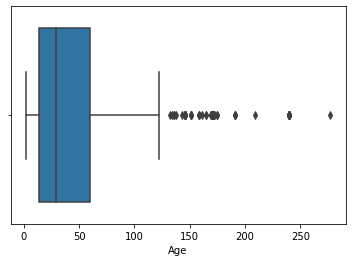

In [61]:
sns.boxplot(x="Age",data=salary) 

# As there are outliers in Age column and above we seen that Age column is right skewed so we have to handle outliers by IQR method

In [62]:
Q1=salary["Age"].quantile(0.25)
Q3=salary["Age"].quantile(0.75)
IQR=Q3-Q1
print(IQR)

46.0


In [63]:
Q1

14.0

In [64]:
Q3

60.0

In [65]:
pd.options.display.max_columns=None

In [66]:
salary.loc[salary['Age'] < 14 , 'Age'] = random.randint(14,67)

In [67]:
salary.loc[salary['Age'] > 67 , 'Age'] = random.randint(14,67)

In [68]:
salary.shape #Here we check that column dropped or not

(742, 39)

In [69]:
correlation=salary.corr()

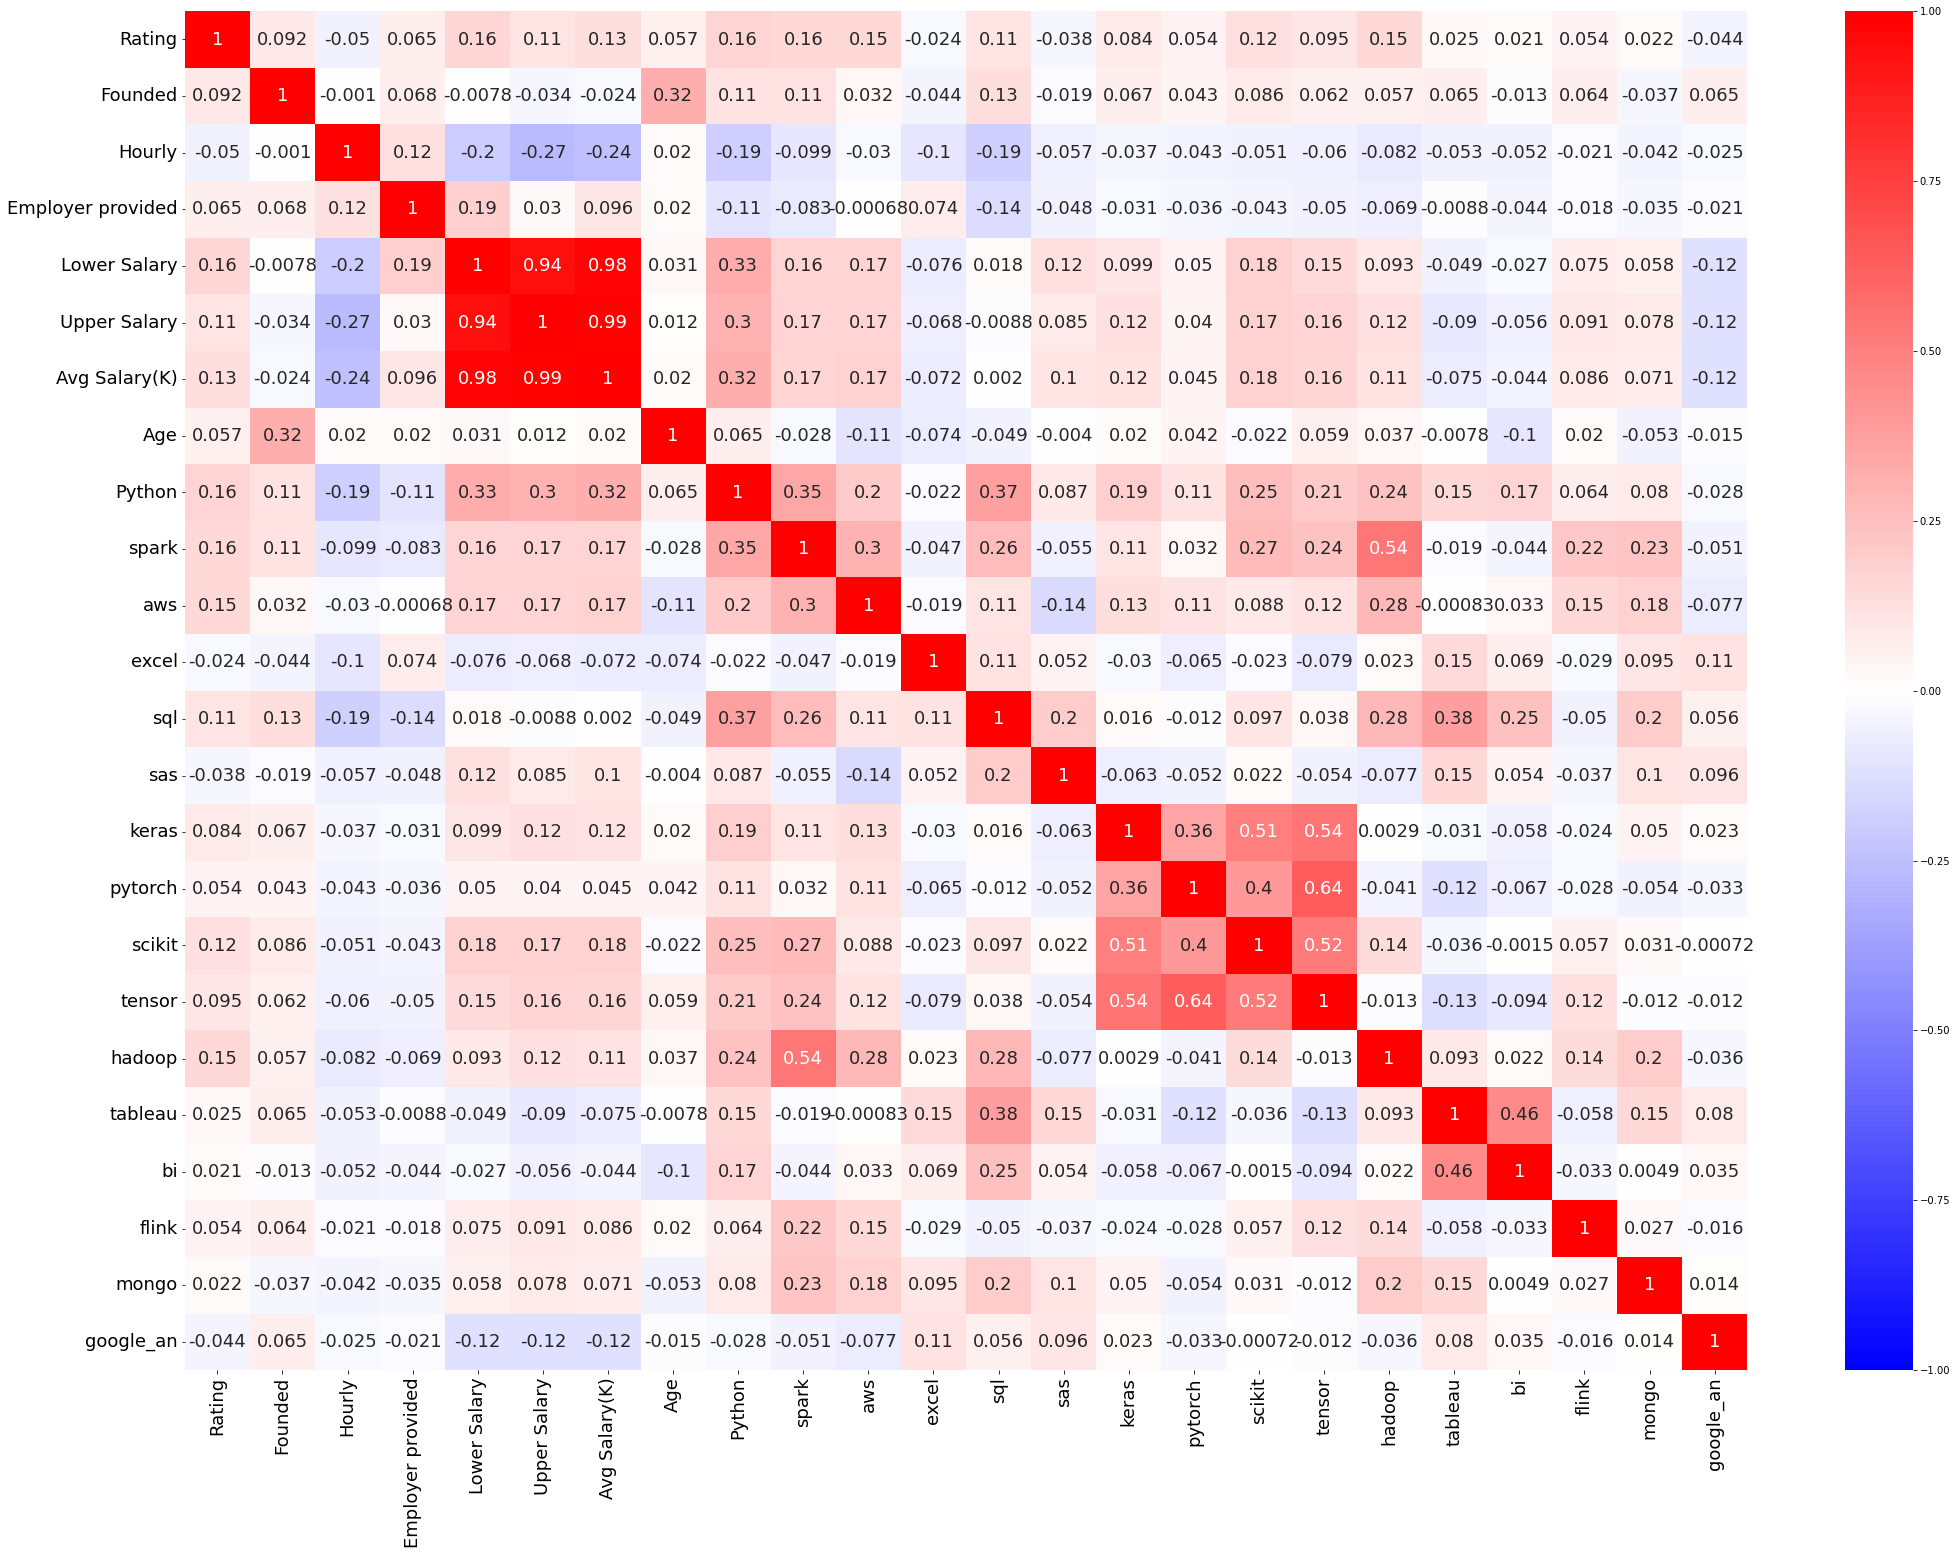

In [70]:
# set the plot size
plt.figure(figsize = (35,25))
# plot the heat map
# correlation: give the correlation matrix
# cmap: color code used for plotting
# annot_kws: sets the font size of the annotation
# annot: prints the correlation values in the chart
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
sns.heatmap(correlation,annot = True, vmax = 1.0, vmin = -1.0, cmap = 'bwr', annot_kws = {"size": 18})
# set the size of x and y axes labels using 'fontsize'
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

In above correlation heat map we get know that only some columns are morely correlated like upper salary,lower salary and avg salary but at time of model building we will not consider lower salary and upper salary

In [71]:
salary["Avg Salary(K)"].max()

254.0

In [72]:
salary[salary["Avg Salary(K)"]==254]["Job Location"]

354    IL
528    IL
708    IL
Name: Job Location, dtype: object

# As above we get to know that highest salary available in Illinois state

In [73]:
# Making a dataframe with only 3 columns: Job Location, Lower Salary and Upper Salary.

A=salary.groupby("Job Location")["Lower Salary","Upper Salary"].mean().reset_index()
A

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Job Location,Lower Salary,Upper Salary
0,AL,40.875000,75.000000
1,AZ,65.777778,105.555556
2,CA,92.427632,154.598684
3,CO,64.272727,108.090909
4,CT,57.600000,84.600000
5,DC,88.636364,131.727273
6,DE,43.000000,70.000000
7,FL,60.375000,94.875000
8,GA,55.666667,105.666667
9,IA,56.400000,101.400000


In [74]:
salary["Job Location"].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: Job Location, dtype: int64

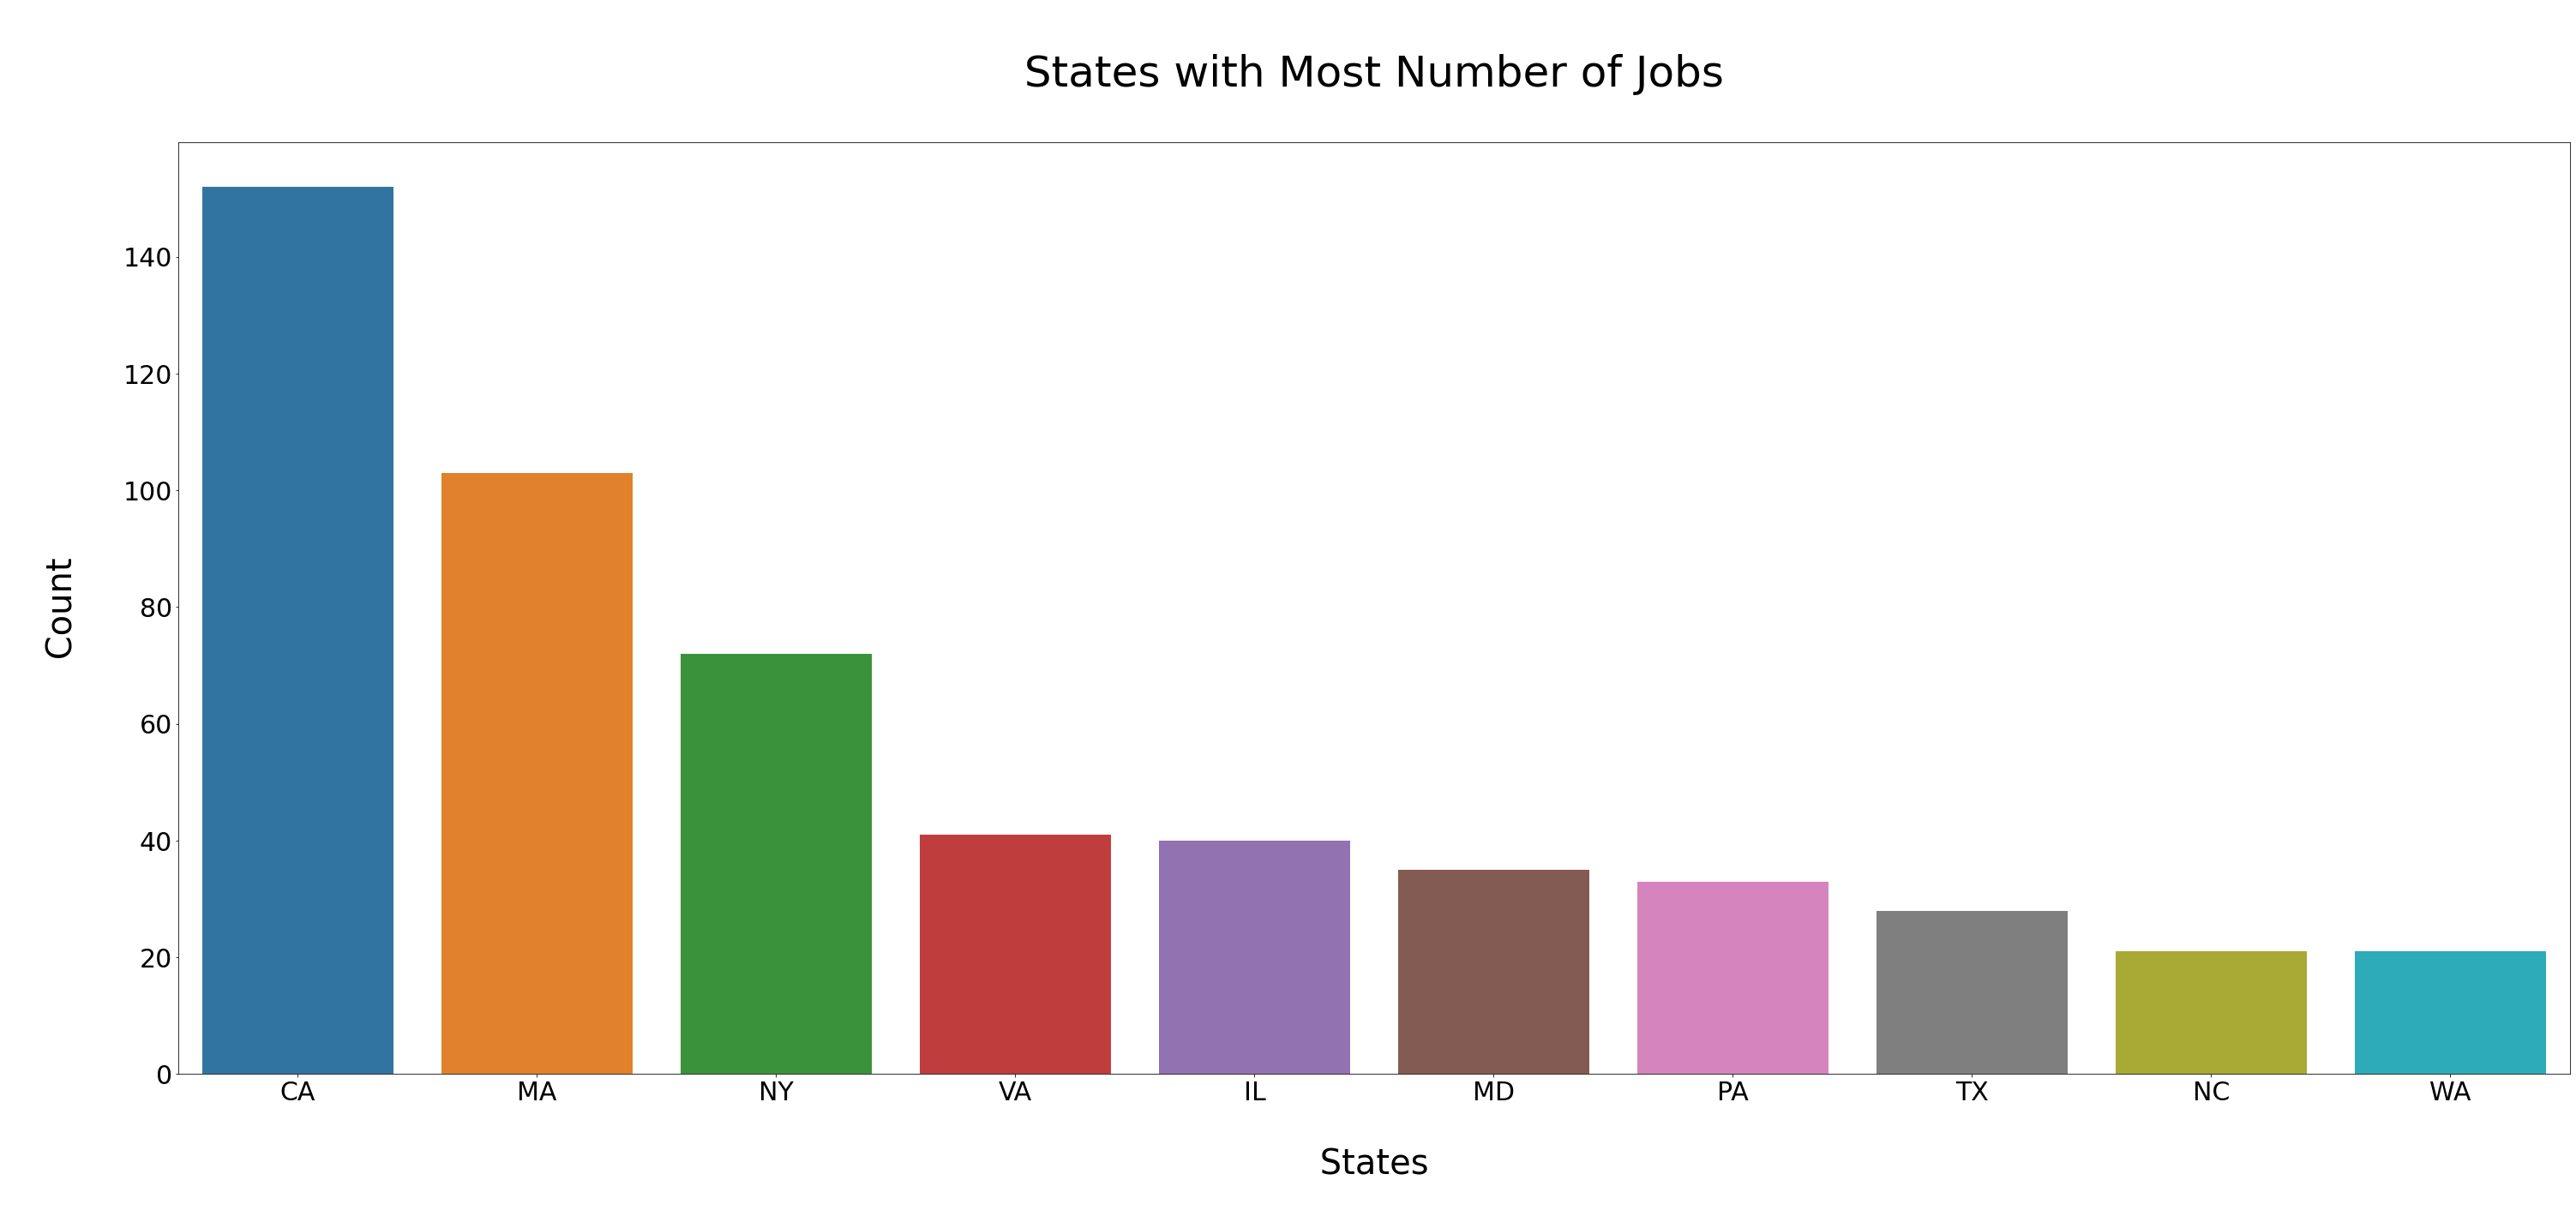

In [75]:
plt.figure(figsize=(50,20))
sns.barplot(x=salary["Job Location"].value_counts().index[0:10], y = salary["Job Location"].value_counts()[0:10],)
plt.title('\n States with Most Number of Jobs \n', size=50, color='black')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('\n States \n', fontsize=40, color='black')
plt.ylabel('\n Count \n', fontsize=40, color='black')
plt.show()

# As per above plot we get to know that maximum jobs available in California state.

In [76]:
salary.shape

(742, 39)

In [77]:
salary.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'Hourly',
       'Employer provided', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)',
       'Job Location', 'Age', 'Python', 'spark', 'aws', 'excel', 'sql', 'sas',
       'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi',
       'flink', 'mongo', 'google_an', 'job_title_sim', 'seniority_by_title',
       'Degree'],
      dtype='object')

# Average Salary in Different States.

In [78]:
#Making a DF of Average Salary of top 10 states in which job postings was maximum.

B = salary.groupby("Job Location")["Avg Salary(K)"].mean().sort_values(ascending=False)[0:10]
B = B.reset_index().rename(columns={"Job Location":"Location","Avg Salary(K)":"Average Salary"})

In [79]:
B

,Location,Average Salary
0,CA,123.513158
1,IL,116.662500
2,DC,110.181818
3,MA,107.495146
4,NJ,104.558824
5,MI,100.250000
6,RI,100.000000
7,NY,98.652778
8,NC,98.452381
9,MD,97.357143


In [80]:
salary["Job Location"].nunique()

37

<AxesSubplot:xlabel='Average Salary', ylabel='Location'>

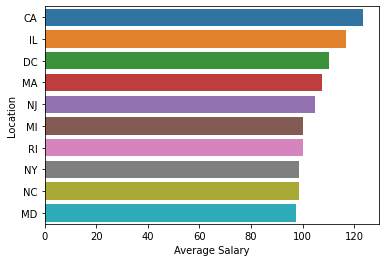

In [81]:
# Plotting the average salary per annum for different states.
sns.barplot(y="Location", x = "Average Salary",data=B)

# As per above graph we get to know that avg salary is more in California state

# Relation between Average Salary and Education

In [82]:
pd.pivot_table(salary, index = 'job_title_sim', columns = "Degree", values = 'Avg Salary(K)', aggfunc = ['mean','count']).rename(columns={"mean":"Avg Salary(K)"})

Avg Salary(K)                          count  \
Degree                                     M           P          na      M   
job_title_sim                                                                 
Data scientist project manager     83.800000         NaN   68.409091    5.0   
analyst                            61.333333         NaN   67.858108   27.0   
data analitics                     82.500000         NaN   61.300000    3.0   
data engineer                     103.714286  132.250000  105.469512   35.0   
data modeler                       63.166667         NaN   99.000000    3.0   
data scientist                    117.847826  129.578947  115.613139  138.0   
director                                 NaN  150.666667  101.000000    NaN   
machine learning engineer         125.000000  134.200000  118.950000    2.0   
na                                 92.000000         NaN   91.083333    4.0   
other scientist                   102.771429  100.509259   66.064815   35.0   

                                             
Degree                             P     na  
job_title_sim                                
Data scientist project manager   NaN   11.0  
analyst                          NaN   74.0  
data analitics                   NaN    5.0  
data engineer                    2.0   82.0  
data modeler                     NaN    2.0  
data scientist                  38.0  137.0  
director                         3.0    2.0  
machine learning engineer       10.0   10.0  
na                               NaN    6.0  
other scientist                 54.0   54.0

-Most of the companies has mentioned Masters degree in their job descriptions.

-For companies that mentioned a PhD degree in their job description, they offered much highes average annual salary as compared to Masters.

In [83]:
# According to my opinion job description will not be play role in salary prediction so I am droppig that column

In [84]:
salary.drop("Job Description",axis=1,inplace=True)

# What are the top skills for each job title?

In [85]:
skill_labels = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
                'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']
skills_by_title = salary.groupby('job_title_sim')[skill_labels].sum()
skills_by_title 

,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
job_title_sim,,,,,,,,,,,,,,,,
Data scientist project manager,4.0,0.0,2.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,0.0,0.0,0.0
analyst,31.0,6.0,10.0,77.0,75.0,11.0,0.0,0.0,0.0,0.0,3.0,40.0,17.0,0.0,3.0,11.0
data analitics,5.0,0.0,0.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0
data engineer,77.0,67.0,59.0,54.0,87.0,1.0,0.0,0.0,0.0,2.0,50.0,11.0,3.0,6.0,13.0,0.0
data modeler,2.0,1.0,2.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
data scientist,240.0,84.0,79.0,155.0,176.0,50.0,29.0,33.0,47.0,60.0,60.0,76.0,28.0,4.0,19.0,3.0
director,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
machine learning engineer,18.0,4.0,6.0,7.0,13.0,0.0,0.0,5.0,7.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0
na,4.0,5.0,3.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,2.0,0.0,2.0,0.0


It looks like **Python** and **SQL** are the top skills in demand for Data Scientists, Data Engineers,analyst and Machine Learning Engineers. **Excel** is also a good skill to have for many of the jobs listed.

### How does salary break down by company size?

In [86]:
salary_labels = ['Lower Salary', 'Upper Salary', 'Avg Salary(K)']
salary_by_co_size = salary.groupby('Size')[salary_labels].mean()
salary_by_co_size

,Lower Salary,Upper Salary,Avg Salary(K)
Size,,,
1 - 50,78.580645,131.548387,105.064516
10000+,83.661538,141.946154,112.803846
1001 - 5000,68.953333,120.426667,94.690000
201 - 500,72.136752,128.358974,100.247863
5001 - 10000,70.421053,124.552632,97.486842
501 - 1000,66.865672,116.141791,91.503731
51 - 200,84.468085,139.074468,111.771277
unknown,112.100000,142.000000,127.050000


As observed above largest companies can afford to pay the best.

<AxesSubplot:xlabel='Sector'>

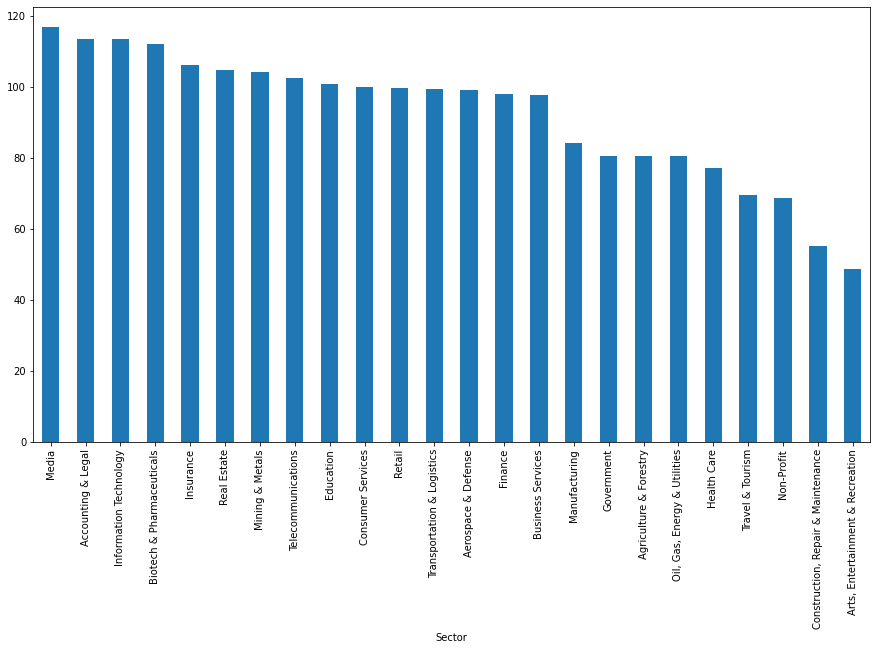

In [87]:
df1=salary.groupby('Sector')['Avg Salary(K)'].mean().sort_values(ascending=False)
plt.figure(figsize = (15,8))
df1.plot.bar()

## As observed above we get to know that highest avg salary available in media sector

<AxesSubplot:xlabel='job_title_sim'>

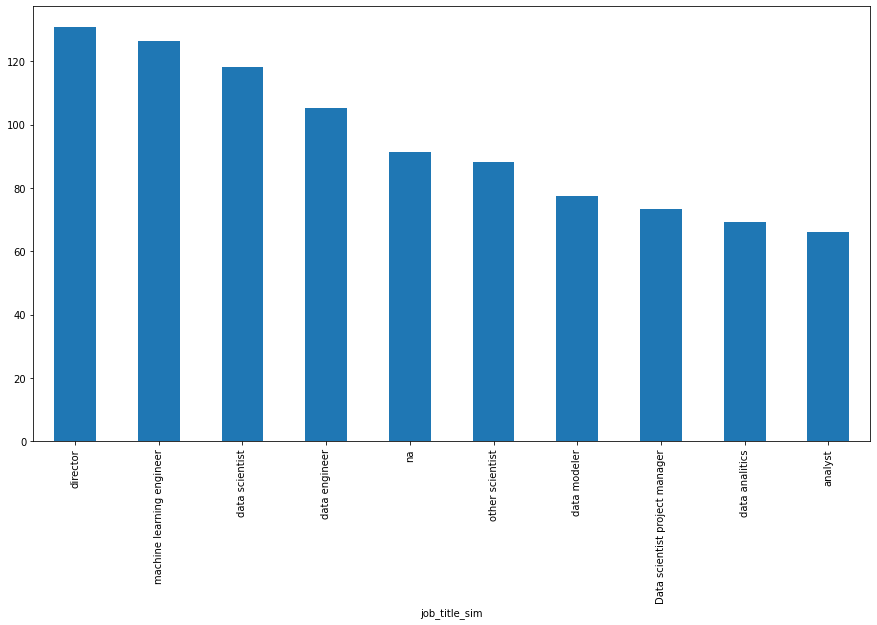

In [88]:
df2=salary.groupby('job_title_sim')['Avg Salary(K)'].mean().sort_values(ascending=False)
plt.figure(figsize = (15,8))
df2.plot.bar()

## As above we get to know that after director highest salary get to MLE and Data scientist and data engineer

In [89]:
salary.shape

(742, 38)

In [90]:
salary.drop("Headquarters",axis=1,inplace=True)# I dropped Headquarter column as I think it not reauired for salary prediction

In [91]:
salary.drop("Competitors",axis=1,inplace=True)# I dropped Competitors column as I think it not reauired for salary prediction

In [92]:
salary.drop("Job Title",axis=1,inplace=True)# I dropped Job Title column as we have another column in which they have segregate
#  Job title in main columns

In [93]:
salary.drop("Salary Estimate",axis=1,inplace=True)# I dropped Salary Estimate column as we have another column "Avg Salary(k)"

In [94]:
salary.drop("Industry",axis=1,inplace=True) # As Industry gets divide into sector so I am dropping Industry column

In [95]:
salary.drop("Hourly",axis=1,inplace=True)
salary.drop("Employer provided",axis=1,inplace=True)# as both column not required for salary prediction so we will drop them

In [96]:
salary.drop("Lower Salary",axis=1,inplace=True)
salary.drop("Upper Salary",axis=1,inplace=True)#As Lower salary and upper salary are correlated and it doesn't take into consideration while predict wo we will drop

In [97]:
salary.columns

Index(['Rating', 'Company Name', 'Size', 'Founded', 'Type of ownership',
       'Sector', 'Revenue', 'Avg Salary(K)', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [98]:
salary.drop("Company Name",axis=1,inplace=True)

In [99]:
salary.shape

(742, 28)

In [100]:
len(salary.Sector.value_counts())

24

In [101]:
salary["Type of ownership"].value_counts()

Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               13
Other Organization                  5
School / School District            2
Name: Type of ownership, dtype: int64

In [102]:
salary.Revenue.value_counts()

Unknown / Non-Applicable            204
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: Revenue, dtype: int64

<AxesSubplot:xlabel='Avg Salary(K)', ylabel='Revenue'>

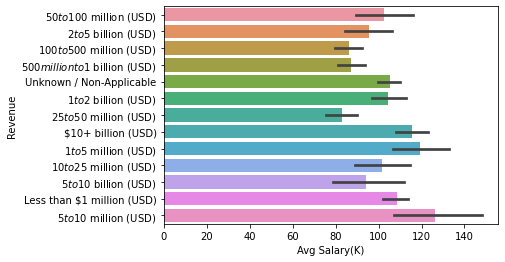

In [103]:
sns.barplot(y="Revenue",x="Avg Salary(K)",data=salary)

In [104]:
salary1=salary

## we creating another data frame we will build a model on both in "salary1" we will drop remaining columns only include skills and on"salary we will do OHE encoding and  build a model

**Filter numerical and categorical variables**

In [105]:
df_numeric = salary.select_dtypes(include=np.number)

In [106]:
df_numeric.head()

,Rating,Founded,Avg Salary(K),Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
0,3.8,1973.0,72.0,48.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,3.4,1984.0,87.5,37.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.8,2010.0,85.0,52.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.8,1965.0,76.5,56.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.9,1998.0,114.5,23.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
df_numeric.shape

(742, 20)

In [108]:
df_categoric = salary.select_dtypes(include = object)

In [109]:
df_categoric.head()

,Size,Type of ownership,Sector,Revenue,Job Location,job_title_sim,seniority_by_title,Degree
0,501 - 1000,Company - Private,Aerospace & Defense,$50 to $100 million (USD),NM,data scientist,na,M
1,10000+,Other Organization,Health Care,$2 to $5 billion (USD),MD,data scientist,na,M
2,501 - 1000,Company - Private,Business Services,$100 to $500 million (USD),FL,data scientist,na,M
3,1001 - 5000,Government,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),WA,data scientist,na,na
4,51 - 200,Company - Private,Business Services,Unknown / Non-Applicable,NY,data scientist,na,na


In [110]:
df_categoric.shape

(742, 8)

**Dummy encode the catergorical variables**

In [111]:
dummy_encoded_variables = pd.get_dummies(df_categoric, drop_first = True)

In [112]:
dummy_encoded_variables.head()

,Size_10000+,Size_1001 - 5000,Size_201 - 500,Size_5001 - 10000,Size_501 - 1000,Size_51 - 200,Size_unknown,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,Job Location_AZ,Job Location_CA,Job Location_CO,Job Location_CT,Job Location_DC,Job Location_DE,Job Location_FL,Job Location_GA,Job Location_IA,Job Location_ID,Job Location_IL,Job Location_IN,Job Location_KS,Job Location_KY,Job Location_LA,Job Location_MA,Job Location_MD,Job Location_MI,Job Location_MN,Job Location_MO,Job Location_NC,Job Location_NE,Job Location_NJ,Job Location_NM,Job Location_NY,Job Location_OH,Job Location_OR,Job Location_PA,Job Location_RI,Job Location_SC,Job Location_TN,Job Location_TX,Job Location_UT,Job Location_VA,Job Location_WA,Job Location_WI,job_title_sim_analyst,job_title_sim_data analitics,job_title_sim_data engineer,job_title_sim_data modeler,job_title_sim_data scientist,job_title_sim_director,job_title_sim_machine learning engineer,job_title_sim_na,job_title_sim_other scientist,seniority_by_title_na,seniority_by_title_sr,Degree_P,Degree_na
0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [113]:
dummy_encoded_variables.shape

(742, 99)

**Concatenate numerical and dummy encoded categorical variables**

In [114]:
# concatenate the numerical and dummy encoded categorical variables column-wise
df_dummy = pd.concat([df_numeric, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

,Rating,Founded,Avg Salary(K),Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,Size_10000+,Size_1001 - 5000,Size_201 - 500,Size_5001 - 10000,Size_501 - 1000,Size_51 - 200,Size_unknown,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,Job Location_AZ,Job Location_CA,Job Location_CO,Job Location_CT,Job Location_DC,Job Location_DE,Job Location_FL,Job Location_GA,Job Location_IA,Job Location_ID,Job Location_IL,Job Location_IN,Job Location_KS,Job Location_KY,Job Location_LA,Job Location_MA,Job Location_MD,Job Location_MI,Job Location_MN,Job Location_MO,Job Location_NC,Job Location_NE,Job Location_NJ,Job Location_NM,Job Location_NY,Job Location_OH,Job Location_OR,Job Location_PA,Job Location_RI,Job Location_SC,Job Location_TN,Job Location_TX,Job Location_UT,Job Location_VA,Job Location_WA,Job Location_WI,job_title_sim_analyst,job_title_sim_data analitics,job_title_sim_data engineer,job_title_sim_data modeler,job_title_sim_data scientist,job_title_sim_director,job_title_sim_machine learning engineer,job_title_sim_na,job_title_sim_other scientist,seniority_by_title_na,seniority_by_title_sr,Degree_P,Degree_na
0,3.8,1973.0,72.0,48.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,3.4,1984.0,87.5,37.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,4.8,2010.0,85.0,52.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,3.8,1965.0,76.5,56.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,2.9,1998.0,114.5,23.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [115]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
X = df_dummy.drop(["Avg Salary(K)"], axis = 1)

# extract the target variable from the data set
y = df_dummy[["Avg Salary(K)"]]


In [116]:
# split data into train data and test data 
# what proportion of data should be included in test data is passed using 'test_size'
# set 'random_state' to get the same data each time the code is executed 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (593, 119)
The shape of X_test is: (149, 119)
The shape of y_train is: (593, 1)
The shape of y_test is: (149, 1)


# 1.OLS

In [117]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
linreg_full = sm.OLS(y_train, X_train).fit()

# print the summary output
print(linreg_full.summary())

                            OLS Regression Results                            
Dep. Variable:          Avg Salary(K)   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     8.037
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           1.57e-61
Time:                        05:57:32   Log-Likelihood:                -2667.0
No. Observations:                 593   AIC:                             5570.
Df Residuals:                     475   BIC:                             6088.
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [118]:
linreg_full_predictions = linreg_full.predict(X_test)
linreg_full_predictions

273    147.009827
414     54.348950
529    122.459113
502     92.917112
729     83.847418
          ...    
247    106.932136
341    102.317009
298    139.275097
132     92.605944
656    127.865517
Length: 149, dtype: float64

In [119]:
actual_salary = y_test["Avg Salary(K)"]
actual_salary

273     90.0
414     62.5
529    125.0
502     97.5
729     70.0
       ...  
247     50.0
341    111.5
298    162.5
132     81.5
656    114.0
Name: Avg Salary(K), Length: 149, dtype: float64

In [120]:
# calculate rmse using rmse()
linreg_full_rmse = rmse(actual_salary,linreg_full_predictions )

# calculate R-squared using rsquared
linreg_full_rsquared = linreg_full.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_rsquared_adj = linreg_full.rsquared_adj 

In [121]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_full_metrics = pd.Series({'Model': "Linreg full model ",
                     'RMSE':linreg_full_rmse,
                     'R-Squared': linreg_full_rsquared,
                     'Adj. R-Squared': linreg_full_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,28.241595,0.664391,0.581725


# 2.Linear Regression with SGD

In [122]:
# importing library min max scaler to scale data
from sklearn.preprocessing import MinMaxScaler
#import library for implement Linear Regression
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler


In [123]:
scaler= StandardScaler()

In [124]:
scaler.fit(X)

StandardScaler()

In [125]:
X1= scaler.fit_transform(X)

In [126]:
X1

array([[ 0.        ,  0.19731918,  0.02945032, ..., -0.64919638,
        -0.41049231, -1.03288546],
       [ 0.        , -0.50974121,  0.23901746, ..., -0.64919638,
        -0.41049231, -1.03288546],
       [ 0.        ,  1.96497014,  0.73435796, ..., -0.64919638,
        -0.41049231, -1.03288546],
       ...,
       [ 0.        , -1.92386197,  0.23901746, ..., -0.64919638,
         2.43609923, -1.03288546],
       [ 0.        , -0.8632714 ,  0.39142992, ..., -0.64919638,
        -0.41049231,  0.96816156],
       [ 0.        , -0.15621101, -0.08485903, ..., -0.64919638,
        -0.41049231, -1.03288546]])

In [127]:
y1=y

In [128]:
y1

,Avg Salary(K)
0,72.0
1,87.5
2,85.0
3,76.5
4,114.5
...,...
737,84.5
738,102.5
739,73.5
740,127.5


In [129]:
# split data into train data and test data 
# what proportion of data should be included in test data is passed using 'test_size'
# set 'random_state' to get the same data each time the code is executed 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X1_train is:",X1_train.shape)

# print dimension of predictors test set
print("The shape of X1_test is:",X1_test.shape)

# print dimension of target train set
print("The shape of y1_train is:",y1_train.shape)

# print dimension of target test set
print("The shape of y1_test is:",y1_test.shape)

The shape of X1_train is: (593, 119)
The shape of X1_test is: (149, 119)
The shape of y1_train is: (593, 1)
The shape of y1_test is: (149, 1)


In [130]:
# build the model
SGD_model = SGDRegressor(loss="squared_loss",alpha = 0.1, max_iter = 3000) #Instantiation

# fit the model
SGD_model.fit(X1_train, y1_train) #Training

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor(alpha=0.1, max_iter=3000)

In [131]:
# predict the values
y1_pred_SGD  = SGD_model.predict(X1_test)

In [132]:
y1_pred_SGD

array([145.60577524,  77.64941424, 123.64069888,  86.32653079,
        83.56519094,  79.87811523,  92.70450987,  67.81694089,
        58.5248508 ,  68.99959354,  90.79407652,  87.15541566,
        64.36537687,  87.702765  , 107.41680244,  58.14680009,
        91.61448578,  57.64946671,  83.3759265 , 102.5668542 ,
       113.1621962 ,  65.00999463, 135.40648756, 107.97448357,
        70.49866176, 104.516324  ,  91.53415511, 115.57079277,
        82.91531747, 143.46926361, 105.75889998,  52.8360899 ,
       149.61968367,  90.35079887, 129.87330314,  96.79223034,
        47.37501381,  43.31016028, 106.57844848, 131.95875652,
       101.33854294,  49.62656781, 125.95980027,  95.39847666,
        89.14991206,  96.05063081,  57.64946671, 146.32971561,
        90.81116765,  64.9758212 ,  53.86173989, 131.95875652,
        93.33290484, 121.60949704,  94.11661242, 123.64069888,
        57.08965588, 140.39049892, 115.06790615,  83.07388061,
       137.83897955, 101.87484678,  40.46083758,  49.70

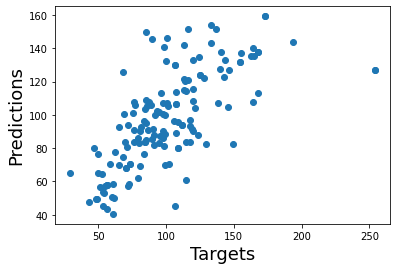

In [133]:
plt.scatter(y1_test,y1_pred_SGD)
plt.xlabel('Targets' ,size = 18)
plt.ylabel('Predictions',size = 18)
plt.show()

In [134]:
r_squared_SGD = SGD_model.score(X1_train,y1_train)
# Number of observation or sample size
n = 593 

# No of independent variables
p = 119

#Compute Adj-R-Squared
Adj_r_squared_SGD = 1 - (1-r_squared_SGD)*(n-1)/(n-p-1)

# Compute RMSE
rmse_SGD = sqrt(mean_squared_error(y1_test, y1_pred_SGD))


In [135]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Linear regression with SGD ",
                     'RMSE':rmse_SGD,
                     'R-Squared': r_squared_SGD,
                     'Adj. R-Squared': Adj_r_squared_SGD     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,28.241595,0.664391,0.581725
1,Linear regression with SGD,27.167498,0.649935,0.561864


# 3. Decision Tree

In [136]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [137]:
# instantiate the 'DecisionTreeRegressor' object using 'mse' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree = DecisionTreeRegressor(criterion = 'mse', random_state = 10) #Max depth D.Tree gets formed

# fit the model using fit() on train data
decision_tree_model = decision_tree.fit(X_train, y_train) #fit() method is defined inside the class 'DecisionTreeClassifier'

In [138]:
y_pred_DT=decision_tree_model.predict(X_test)

In [139]:
y_pred_DT

array([119.5       ,  62.5       , 120.        ,  97.5       ,
        70.        , 109.        ,  65.5       ,  95.5       ,
        72.5       ,  81.        ,  71.75      ,  77.5       ,
        41.5       , 123.5       , 164.5       ,  85.5       ,
        93.33333333,  56.5       ,  84.5       ,  93.5       ,
        91.        ,  62.        , 112.5       ,  85.        ,
        73.5       ,  87.5       ,  78.        , 120.        ,
        80.        , 194.        ,  91.        ,  54.        ,
       142.5       ,  87.        , 139.        , 120.        ,
        43.        ,  53.5       , 107.5       , 153.5       ,
        75.5       ,  49.        ,  68.5       , 109.        ,
        59.5       ,  84.        ,  56.5       , 111.        ,
        64.5       ,  50.        ,  58.        , 153.5       ,
        90.66666667, 113.5       , 111.5       , 120.        ,
        50.        , 164.        , 113.5       , 177.        ,
       128.        ,  95.        ,  61.        ,  48.5 

In [140]:
y_test

,Avg Salary(K)
273,90.0
414,62.5
529,125.0
502,97.5
729,70.0
...,...
247,50.0
341,111.5
298,162.5
132,81.5


In [141]:
r_squared_DT=decision_tree_model.score(X_test,y_test)
# Number of observation or sample size
n = 593 

# No of independent variables
p = 119

#Compute Adj-R-Squared
Adj_r_squared_DT = 1 - (1-r_squared_DT)*(n-1)/(n-p-1)
Adj_r_squared_DT

0.6488766386357617

In [142]:
# Compute RMSE
rmse_DT = sqrt(mean_squared_error(y_test, y_pred_DT))

In [143]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Decision Tree Model ",
                     'RMSE':rmse_DT,
                     'R-Squared': r_squared_DT,
                     'Adj. R-Squared': Adj_r_squared_DT     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,28.241595,0.664391,0.581725
1,Linear regression with SGD,27.167498,0.649935,0.561864
2,Decision Tree Model,19.736933,0.719457,0.648877


# 4.Decision Tree with pruning

In [144]:
# instantiate the 'DecisionTreeRegressor' object
# max_depth: maximum depth of the tree 
# max_leaf_nodes: maximum number of leaf nodes in the tree
# pass the 'random_state' to obtain the same samples for each time you run the code
prune = DecisionTreeRegressor(max_depth = 10, max_leaf_nodes = 32 , random_state = 10)

# fit the model using fit() on train data
decision_tree_prune = prune.fit(X_train, y_train)

In [145]:
y_pred_DT_prune=decision_tree_prune.predict(X_test)

In [146]:
y_pred_DT_prune

array([119.625     ,  59.05172414,  81.86206897, 104.3880597 ,
        60.7244898 ,  93.12931034,  98.98837209,  93.12931034,
        59.05172414,  60.7244898 ,  89.32      ,  93.12931034,
        81.86206897,  59.05172414, 151.34210526,  81.86206897,
        98.98837209,  60.7244898 ,  98.98837209,  81.86206897,
       104.3880597 ,  59.05172414, 127.70491803,  89.32      ,
        81.86206897, 104.3880597 ,  93.12931034,  81.86206897,
        98.98837209, 191.125     , 104.3880597 ,  59.05172414,
       151.34210526,  90.63461538, 127.70491803,  81.86206897,
        59.05172414,  59.05172414,  98.98837209, 151.34210526,
       104.3880597 ,  59.05172414, 101.5       ,  98.98837209,
        59.05172414,  89.32      ,  60.7244898 ,  60.7244898 ,
        93.12931034,  59.05172414,  59.05172414, 151.34210526,
        98.98837209,  89.32      ,  90.63461538,  81.86206897,
        59.05172414, 127.70491803, 119.625     , 177.        ,
        98.98837209, 104.3880597 ,  70.69230769,  59.05

In [147]:
r_squared_DT_prune=decision_tree_prune.score(X_test,y_test)
# Number of observation or sample size
n = 593 

# No of independent variables
p = 119

#Compute Adj-R-Squared
Adj_r_squared_DT_prune = 1 - (1-r_squared_DT_prune)*(n-1)/(n-p-1)
Adj_r_squared_DT_prune
# Compute RMSE
rmse_DT_prune = sqrt(mean_squared_error(y_test, y_pred_DT_prune))

In [148]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Decision Tree Model after pruning ",
                     'RMSE':rmse_DT_prune,
                     'R-Squared': r_squared_DT_prune,
                     'Adj. R-Squared': Adj_r_squared_DT_prune     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,28.241595,0.664391,0.581725
1,Linear regression with SGD,27.167498,0.649935,0.561864
2,Decision Tree Model,19.736933,0.719457,0.648877
3,Decision Tree Model after pruning,26.343350,0.500217,0.374478


# 5.Decision Tree with grid search CV

In [149]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'mse' and 'mae' to the parameter, 'criterion' 
# pass the list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the list of values to 'max_depth' that assigns maximum depth of the tree
# pass the list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['mse', 'mae'],
                     'min_samples_split': [10, 20, 30],
                     'max_depth': [3, 5, 7, 9,12,15,20,25],
                     'min_samples_leaf': [15, 20, 25, 30, 35],
                     'max_leaf_nodes': [5, 10, 15, 20, 25]}]

In [150]:
# instantiate the 'DecisionTreeRegressor' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_regressor = DecisionTreeRegressor(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
grid = GridSearchCV(estimator = decision_tree_regressor, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree Regressor: ', dt_grid.best_params_, '\n')

Best parameters for decision tree Regressor:  {'criterion': 'mae', 'max_depth': 7, 'max_leaf_nodes': 15, 'min_samples_leaf': 15, 'min_samples_split': 10} 



In [151]:
y_pred_grid=dt_grid.predict(X_test)

In [152]:
y_pred_grid

array([114.  ,  61.  ,  73.  ,  96.5 ,  73.  ,  87.  , 122.5 ,  87.  ,
        61.  ,  73.  ,  85.  ,  87.  , 100.25,  61.  , 146.5 ,  64.  ,
       122.5 ,  64.  ,  98.  ,  87.  , 112.5 ,  61.  , 122.5 ,  85.  ,
        73.  ,  96.5 ,  87.  ,  73.  ,  98.  , 151.  , 112.5 ,  61.  ,
       146.5 ,  87.  , 122.5 ,  87.  ,  61.  ,  61.  , 117.5 , 146.5 ,
        96.5 ,  61.  , 114.  , 117.5 ,  61.  ,  85.  ,  64.  ,  87.  ,
        87.  ,  61.  ,  61.  , 146.5 , 117.5 ,  85.  ,  73.  ,  73.  ,
        61.  , 139.5 , 114.  ,  87.  , 122.5 ,  96.5 ,  61.  ,  61.  ,
        98.  ,  87.  ,  61.  , 112.5 ,  87.  ,  87.  ,  73.  , 112.5 ,
        85.  ,  87.  ,  85.  ,  73.  ,  87.  ,  96.5 ,  61.  ,  87.  ,
       100.25,  64.  ,  85.  , 112.5 ,  87.  ,  85.  ,  87.  ,  96.5 ,
       122.5 , 139.5 ,  85.  ,  87.  ,  96.5 ,  73.  , 122.5 , 151.  ,
        61.  ,  96.5 ,  64.  ,  98.  ,  61.  , 100.25, 122.5 ,  85.  ,
       100.25,  87.  ,  87.  ,  85.  ,  87.  , 146.5 ,  64.  ,  85.  ,
      

In [153]:
r_squared_grid=dt_grid.score(X_test,y_test)
# Number of observation or sample size
n = 593 

# No of independent variables
p = 119

#Compute Adj-R-Squared
Adj_r_squared_grid = 1 - (1-r_squared_grid)*(n-1)/(n-p-1)
Adj_r_squared_grid
# Compute RMSE
rmse_grid = sqrt(mean_squared_error(y_test, y_pred_grid))

In [154]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Decision Tree Model with Grid search CV ",
                     'RMSE':rmse_grid,
                     'R-Squared': r_squared_grid,
                     'Adj. R-Squared': Adj_r_squared_grid     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,28.241595,0.664391,0.581725
1,Linear regression with SGD,27.167498,0.649935,0.561864
2,Decision Tree Model,19.736933,0.719457,0.648877
3,Decision Tree Model after pruning,26.343350,0.500217,0.374478
4,Decision Tree Model with Grid search CV,32.146744,0.255759,0.068518


# 5.Rndom forest

In [155]:
# import library for random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [156]:
#intantiate the regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(random_state=10)

In [157]:
# predict the values on test dataset using predict()
y_pred_RF = rf_reg.predict(X_test)

In [158]:
y_pred_RF

array([120.655     ,  63.545     ,  94.685     ,  93.33      ,
        73.35      , 100.255     ,  74.925     ,  87.31      ,
        73.81      ,  79.325     ,  76.62194048,  93.265     ,
        96.36      , 102.225     , 153.215     ,  76.66      ,
        94.07858333,  56.73      ,  85.245     ,  92.385     ,
       124.07375   ,  54.815     , 121.255     , 102.7575    ,
        80.3       , 112.96      , 103.355     , 109.9175    ,
        85.845     , 169.895     , 111.01      ,  56.005     ,
       139.56      ,  79.905     , 135.48      , 110.375     ,
        52.5       ,  60.75      , 107.68833333, 145.08785714,
        85.945     ,  55.525     ,  88.34      , 110.53214286,
        80.525875  ,  88.8795    ,  56.73      , 108.52      ,
        78.07      ,  54.215     ,  59.99      , 145.08785714,
        89.14504361, 108.465     , 102.66      ,  94.685     ,
        55.54      , 151.29722222, 115.86      , 100.705     ,
       113.26125   ,  96.825     ,  62.645     ,  49.59

In [159]:
# Calculate MAE
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred_RF)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred_RF)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 13.227647717867518
Mean Squared Error (MSE): 333.81385359850646
Root Mean Squared Error (RMSE): 18.270573433762458


In [160]:
r_squared_RF=rf_reg.score(X_test,y_test)
# Number of observation or sample size
n = 593 

# No of independent variables
p = 119

#Compute Adj-R-Squared
Adj_r_squared_RF = 1 - (1-r_squared_RF)*(n-1)/(n-p-1)
# Compute RMSE
rmse_RF = sqrt(mean_squared_error(y_test, y_pred_RF))

In [161]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Random Forest ",
                     'RMSE':rf_reg_RMSE,
                     'R-Squared': r_squared_RF,
                     'Adj. R-Squared': Adj_r_squared_RF     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,28.241595,0.664391,0.581725
1,Linear regression with SGD,27.167498,0.649935,0.561864
2,Decision Tree Model,19.736933,0.719457,0.648877
3,Decision Tree Model after pruning,26.343350,0.500217,0.374478
4,Decision Tree Model with Grid search CV,32.146744,0.255759,0.068518
5,Random Forest,18.270573,0.759595,0.699112


# 6.Random Forest using Grid search CV

In [162]:
# create a dictionary with hyperparameters and its values
# pass the n_estimators 
# pass the list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the list of values to 'max_depth' that assigns maximum depth of the tree
# pass the list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'n_estimators': [ 70,85,95,100],
                     'min_samples_split': [10,15,20,25],
                     'max_depth': [8, 10,12,14]
                     #'min_samples_leaf': [5,10],
                     #'max_leaf_nodes': [10, 15]
                    }]

In [163]:
# instantiate the 'RandomForestRegressor' 
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_reg_CV= RandomForestRegressor(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# n_estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
grid = GridSearchCV(estimator = rf_reg_CV, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest regressor: ', dt_grid.best_params_, '\n')

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

Best parameters for random forest regressor:  {'max_depth': 14, 'min_samples_split': 10, 'n_estimators': 70} 



In [164]:
# instantiate the 'RandomForestRegressor'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_grid_model = RandomForestRegressor(n_estimators = dt_grid.best_params_.get('n_estimators'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       #max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       #min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

# use fit() to fit the model on the train set
dt_grid_model = dt_grid_model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [165]:
# predict the class labels using 'X_test'
y_pred_grid = dt_grid_model.predict(X_test)

In [166]:
y_pred_grid

array([122.91322905,  66.22523078,  91.97246602,  91.39204239,
        72.79856986,  96.41494178,  82.94362982,  88.31575718,
        76.36097884,  76.26593092,  90.39838456,  91.90286279,
        88.105289  ,  95.57894217, 141.963451  ,  79.35985253,
        94.80687706,  55.46968595,  85.54882527,  89.95489681,
       121.89762136,  56.64864026, 121.86041743, 104.75462554,
        80.23581443, 112.30220741, 104.77576281, 104.03113277,
        88.40502822, 161.36980611, 111.25348838,  58.31761387,
       137.29487278,  81.59009438, 132.76010971, 105.2325937 ,
        56.9421358 ,  61.98368637, 109.17628753, 141.8600139 ,
        94.55321744,  57.32036315, 103.8649342 , 110.63544715,
        80.75027701,  90.06770676,  55.46968595, 103.46958437,
        82.20326577,  55.29149983,  60.71297387, 141.8600139 ,
        90.4138346 , 105.89413608,  96.88587898,  91.97246602,
        56.71715792, 144.66971995, 118.71292394, 105.13639409,
       114.05966809,  96.07158309,  64.84968093,  52.54

In [167]:
# calculate MAE
rf_reg_CV_MAE = metrics.mean_absolute_error(y_test, y_pred_grid)
print('Mean Absolute Error (MAE):', rf_reg_CV_MAE)
                                         
# calculate MSE
rf_reg_CV_MSE = metrics.mean_squared_error(y_test, y_pred_grid)
print('Mean Squared Error (MSE):', rf_reg_CV_MSE)
                                         
# calculate RMSE
rf_reg_CV_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_grid))
print('Root Mean Squared Error (RMSE):', rf_reg_CV_RMSE)

Mean Absolute Error (MAE): 15.761341406909416
Mean Squared Error (MSE): 488.1795431330503
Root Mean Squared Error (RMSE): 22.09478542853608


In [168]:
r_squared_grid=dt_grid_model.score(X_test,y_test)
# Number of observation or sample size
n = 593 

# No of independent variables
p = 119

#Compute Adj-R-Squared
Adj_r_squared_grid = 1 - (1-r_squared_grid)*(n-1)/(n-p-1)
# Compute RMSE
rmse_grid = sqrt(mean_squared_error(y_test, y_pred_grid))

In [169]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Random Forest with Grid Search CV ",
                     'RMSE':rmse_grid,
                     'R-Squared': r_squared_grid,
                     'Adj. R-Squared': Adj_r_squared_grid     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,28.241595,0.664391,0.581725
1,Linear regression with SGD,27.167498,0.649935,0.561864
2,Decision Tree Model,19.736933,0.719457,0.648877
3,Decision Tree Model after pruning,26.343350,0.500217,0.374478
4,Decision Tree Model with Grid search CV,32.146744,0.255759,0.068518
5,Random Forest,18.270573,0.759595,0.699112
6,Random Forest with Grid Search CV,22.094785,0.648424,0.559972


# 7. Ensemble Techniques

In [170]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

In [171]:
x2 = X
y2 = y

In [172]:
x2.shape

(742, 119)

In [173]:
X.shape

(742, 119)

In [174]:
select_feature = SelectKBest(f_regression, k=42).fit(x2,y2)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


In [175]:
X2=select_feature.transform(x2)

In [176]:
X2.shape

(742, 42)

In [177]:
D=select_feature.get_support(indices=True)

In [178]:
D

array([  1,   4,   5,   6,   9,  10,  12,  13,  14,  19,  20,  21,  24,
        25,  28,  30,  31,  37,  38,  45,  46,  48,  51,  60,  61,  63,
        65,  67,  71,  75,  76,  80,  91, 106, 107, 110, 112, 114, 115,
       116, 117, 118])

In [179]:
X

,const,Rating,Founded,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,Size_10000+,Size_1001 - 5000,Size_201 - 500,Size_5001 - 10000,Size_501 - 1000,Size_51 - 200,Size_unknown,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,Job Location_AZ,Job Location_CA,Job Location_CO,Job Location_CT,Job Location_DC,Job Location_DE,Job Location_FL,Job Location_GA,Job Location_IA,Job Location_ID,Job Location_IL,Job Location_IN,Job Location_KS,Job Location_KY,Job Location_LA,Job Location_MA,Job Location_MD,Job Location_MI,Job Location_MN,Job Location_MO,Job Location_NC,Job Location_NE,Job Location_NJ,Job Location_NM,Job Location_NY,Job Location_OH,Job Location_OR,Job Location_PA,Job Location_RI,Job Location_SC,Job Location_TN,Job Location_TX,Job Location_UT,Job Location_VA,Job Location_WA,Job Location_WI,job_title_sim_analyst,job_title_sim_data analitics,job_title_sim_data engineer,job_title_sim_data modeler,job_title_sim_data scientist,job_title_sim_director,job_title_sim_machine learning engineer,job_title_sim_na,job_title_sim_other scientist,seniority_by_title_na,seniority_by_title_sr,Degree_P,Degree_na
0,1.0,3.8,1973.0,48.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1.0,3.4,1984.0,37.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,1.0,4.8,2010.0,52.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,1.0,3.8,1965.0,56.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,1.0,2.9,1998.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [180]:
features_df_new = X.iloc[:,D]

In [181]:
features_df_new.columns

Index(['Rating', 'Python', 'spark', 'aws', 'sas', 'keras', 'scikit', 'tensor',
       'hadoop', 'google_an', 'Size_10000+ ', 'Size_1001 - 5000 ',
       'Size_501 - 1000 ', 'Size_51 - 200 ',
       'Type of ownership_Company - Public', 'Type of ownership_Hospital',
       'Type of ownership_Nonprofit Organization',
       'Sector_Arts, Entertainment & Recreation',
       'Sector_Biotech & Pharmaceuticals', 'Sector_Health Care',
       'Sector_Information Technology', 'Sector_Manufacturing',
       'Sector_Non-Profit', 'Revenue_$10+ billion (USD)',
       'Revenue_$100 to $500 million (USD)',
       'Revenue_$25 to $50 million (USD)', 'Revenue_$5 to $10 million (USD)',
       'Revenue_$500 million to $1 billion (USD)', 'Job Location_CA',
       'Job Location_DE', 'Job Location_FL', 'Job Location_IL',
       'Job Location_NE', 'job_title_sim_analyst',
       'job_title_sim_data analitics', 'job_title_sim_data scientist',
       'job_title_sim_machine learning engineer',
       'job_title

In [182]:
# C=X.columns
# B=select_feature.get_support()
# selected_features=[]
# for bool,X in zip(B,C):
#     if bool:
#         selected_features.append(X)

In [183]:
# selected_features

In [184]:
#import libraries
from sklearn.ensemble import BaggingRegressor

In [185]:
# split data into train data and test data 
# what proportion of data should be included in test data is passed using 'test_size'
# set 'random_state' to get the same data each time the code is executed 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X2_train is:",X2_train.shape)

# print dimension of predictors test set
print("The shape of X2_test is:",X2_test.shape)

# print dimension of target train set
print("The shape of y2_train is:",y2_train.shape)

# print dimension of target test set
print("The shape of y2_test is:",y2_test.shape)

The shape of X2_train is: (593, 42)
The shape of X2_test is: (149, 42)
The shape of y2_train is: (593, 1)
The shape of y2_test is: (149, 1)


In [186]:
# build the model
meta_estimator = BaggingRegressor(tree.DecisionTreeRegressor(random_state=10)) #Similar to a random forest, just that the DT's are having all the features to split on

# fit the model
meta_estimator.fit(X2_train, y2_train) 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=10))

In [187]:
# predict the values
y_pred_ET = meta_estimator.predict(X2_test)

In [188]:
y_pred_ET

array([124.85      ,  62.41666667,  83.8       ,  91.65      ,
        71.075     ,  94.5       ,  71.4       ,  87.95      ,
        80.55      ,  79.67083333,  81.83833333, 109.15      ,
       101.4       , 100.9       , 147.        ,  78.25      ,
        92.69166667,  55.05      ,  84.5       ,  96.9       ,
       125.25      ,  60.45      , 125.35      , 103.06666667,
        72.8       , 113.05      , 100.2       , 113.7       ,
        86.4625    , 193.1125    , 116.7       ,  52.86666667,
       132.55      ,  89.6       , 142.3125    , 102.        ,
        49.8       ,  57.15      , 104.85      , 147.65      ,
        79.55      ,  56.75      ,  87.25      , 105.45      ,
        82.5       ,  87.2       ,  55.05      , 102.2       ,
        92.45      ,  55.65      ,  51.75      , 147.65      ,
        92.13041126, 105.55      , 110.3       ,  83.8       ,
        59.75      , 161.75      , 112.25      ,  71.        ,
       110.65      ,  97.        ,  61.4       ,  48.5 

In [189]:
r_squared_ET=meta_estimator.score(X2_test,y2_test)
# Number of observation or sample size
n = 593 

# No of independent variables
p = 119

#Compute Adj-R-Squared
Adj_r_squared_ET = 1 - (1-r_squared_ET)*(n-1)/(n-p-1)
# Compute RMSE
rmse_ET = sqrt(mean_squared_error(y2_test, y_pred_ET))

In [190]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Ensemble Techniques (Bagging Meta Estimator) ",
                     'RMSE':rmse_ET,
                     'R-Squared': r_squared_ET,
                     'Adj. R-Squared': Adj_r_squared_ET     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,28.241595,0.664391,0.581725
1,Linear regression with SGD,27.167498,0.649935,0.561864
2,Decision Tree Model,19.736933,0.719457,0.648877
3,Decision Tree Model after pruning,26.343350,0.500217,0.374478
4,Decision Tree Model with Grid search CV,32.146744,0.255759,0.068518
5,Random Forest,18.270573,0.759595,0.699112
6,Random Forest with Grid Search CV,22.094785,0.648424,0.559972
7,Ensemble Techniques (Bagging Meta Estimator),18.638650,0.749811,0.686867


# 8. Ensemble Techniques(Adaboost)

In [191]:
from sklearn.ensemble import AdaBoostRegressor

# build the model
adaboost = AdaBoostRegressor(random_state=10)
# fit the model
adaboost.fit(X2_train, y2_train)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostRegressor(random_state=10)

In [192]:
# predict the values
y_pred_adaboost  = adaboost.predict(X2_test)

In [193]:
y_pred_adaboost

array([128.61754386,  83.63480392,  97.87142857, 103.04601227,
        88.51546392,  89.24404762, 108.25      ,  88.51546392,
        86.20833333,  88.51546392, 105.82116788,  91.19782609,
        89.24404762,  92.59139785, 106.17320261,  89.97508897,
       114.31840796,  80.32      , 107.01785714,  89.2375    ,
       102.95      ,  86.64935065, 151.655     , 103.04601227,
        89.24404762, 111.19942197,  98.97627119,  89.97508897,
       106.91534392, 145.79787234, 102.95      ,  83.63480392,
       120.14285714,  89.2375    , 170.06060606,  89.28975265,
        78.52027027,  86.64935065, 103.24634146, 125.76041667,
       111.19942197,  89.28975265, 114.80769231,  98.57857143,
        89.24404762, 114.31840796,  80.32      ,  98.97627119,
        89.28975265,  88.51546392,  78.52027027, 125.76041667,
        98.41542289, 103.04601227, 114.86397059,  97.87142857,
        86.64935065, 143.95266272, 130.9       ,  91.19782609,
       128.25862069, 103.04601227,  88.51546392,  86.64

In [194]:
r_squared_ADA=meta_estimator.score(X2_test,y2_test)
# Number of observation or sample size
n = 593 

# No of independent variables
p = 119

#Compute Adj-R-Squared
Adj_r_squared_ADA = 1 - (1-r_squared_ADA)*(n-1)/(n-p-1)
# Compute RMSE
rmse_ADA = sqrt(mean_squared_error(y2_test, y_pred_adaboost))

In [195]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Ensemble Techniques (ADA Boost) ",
                     'RMSE':rmse_ADA,
                     'R-Squared': r_squared_ADA,
                     'Adj. R-Squared': Adj_r_squared_ADA     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,28.241595,0.664391,0.581725
1,Linear regression with SGD,27.167498,0.649935,0.561864
2,Decision Tree Model,19.736933,0.719457,0.648877
3,Decision Tree Model after pruning,26.343350,0.500217,0.374478
4,Decision Tree Model with Grid search CV,32.146744,0.255759,0.068518
5,Random Forest,18.270573,0.759595,0.699112
6,Random Forest with Grid Search CV,22.094785,0.648424,0.559972
7,Ensemble Techniques (Bagging Meta Estimator),18.638650,0.749811,0.686867
8,Ensemble Techniques (ADA Boost),26.507143,0.749811,0.686867
